In [3]:
import matplotlib.pyplot as plt
from sympy.solvers.solveset import linsolve
import numpy as np
import pandas as pd
import sympy as sp

from nlin_eq_solve_methods import *

In [146]:
x = np.linspace(-5, 5, 100000)
y = 3 * x ** 3 + 1.7 * x ** 2 - 15.42 * x + 6.89

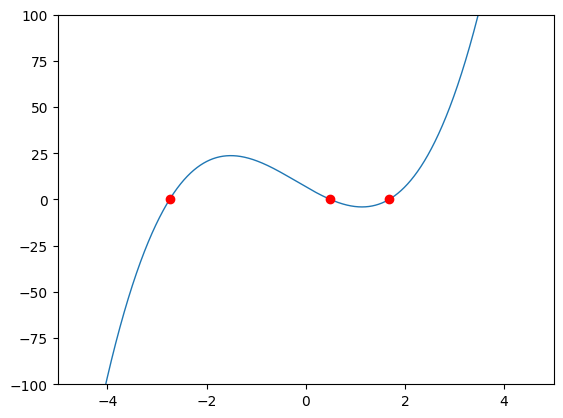

In [147]:
# Графическое решение, смотрим пересечение графика с Осями

fig, ax = plt.subplots()

ax.plot(x, y, linewidth=1.0)

ax.set(xlim=(-5, 5),
       ylim=(-100, 100))

idx = np.argwhere(np.diff(np.sign(0 - y))).flatten()
plt.plot(x[idx], y[idx], 'ro')
plt.show()

In [148]:
x_root_dots = list(x[idx])
x_root_dots

[-2.7444774447744478, 0.4982549825498257, 1.6794667946679471]

In [54]:
manual_intervals = [[-3, -2], [0.4, 0.5], [1.5, 2]]

## Ручное вычисление крайнего правого корня методом простой итерации (5)

In [122]:
a, b = manual_intervals[2]
a, b

(1.5, 2)

In [56]:
x_sym = sp.symbols('x')

In [57]:
start_expr = 3 * x_sym ** 3 + 1.7 * x_sym ** 2 - 15.42 * x_sym + 6.89
start_expr

3*x**3 + 1.7*x**2 - 15.42*x + 6.89

### Первый способ доказать сходимость
Выражаем x из членов разного порядка

In [58]:
expr = start_expr / 15.42
phi = expr + x_sym

In [59]:
phi

0.194552529182879*x**3 + 0.110246433203632*x**2 + 0.446822308690013

In [60]:
phi_df = sp.diff(phi, x_sym)
phi_df

0.583657587548638*x**2 + 0.220492866407263*x

In [61]:
phi_df.subs(x_sym, a)

1.64396887159533

In [62]:
phi_df.subs(x_sym, b)

2.77561608300908

In [63]:
q = max(phi_df.subs(x_sym, a), phi_df.subs(x_sym, b))
q < 1

False

### Второй способ доказать сходимость
Введение параматра лямбда

In [72]:
expr = start_expr
expr

3*x**3 + 1.7*x**2 - 15.42*x + 6.89

In [73]:
lm = sp.symbols('lambda')
phi = x_sym + lm * start_expr
phi

lambda*(3*x**3 + 1.7*x**2 - 15.42*x + 6.89) + x

In [74]:
s_e_diff = sp.diff(expr, x_sym)

a, b = manual_intervals[2]
expr_diff_a = abs(s_e_diff.subs(x_sym, a))
expr_diff_b = abs(s_e_diff.subs(x_sym, b))

In [75]:
lm_res = (-1 / max(expr_diff_a, expr_diff_b))

phi_res = phi.subs(lm, lm_res)

phi_res_diff = sp.diff(phi_res, x_sym)

In [78]:
phi_res_diff.subs(x_sym, a) < 1

True

In [79]:
phi_res_diff.subs(x_sym, b) < 1

True

Условие сходимости выполняется

### Расчет и заполнение таблицы

In [82]:
# Заполним таблицу итераций

x_0 = a
x_1 = round(phi_res.subs(x_sym, x_0), 3)
x_2 = round(phi_res.subs(x_sym, x_1), 3)
x_3 = round(phi_res.subs(x_sym, x_2), 3)
x_4 = round(phi_res.subs(x_sym, x_3), 3)
x_5 = round(phi_res.subs(x_sym, x_4), 3)

table_5_data = {
    'x_k': [x_0, x_1, x_2, x_3, x_4],
    'x_k+1': [x_1, x_2, x_3, x_4, x_5],
    'f(x_k+1)': [round(expr.subs(x_sym, x_1), 3),
                 round(expr.subs(x_sym, x_2), 3),
                 round(expr.subs(x_sym, x_3), 3),
                 round(expr.subs(x_sym, x_4), 3),
                 round(expr.subs(x_sym, x_5), 3),
                ],
    '| x_k+1 - x_k |': [round(abs(x_1 - x_0), 3),
                        round(abs(x_2 - x_1), 3),
                        round(abs(x_3 - x_2), 3),
                        round(abs(x_4 - x_3), 3),
                        round(abs(x_5 - x_4), 3),
                       ]
} 

In [83]:
df_5 = pd.DataFrame(table_5_data)
df_5.index += 1
df_5

,x_k,x_k+1,f(x_k+1),| x_k+1 - x_k |
1,1.5,1.584,-1.347,0.084
2,1.584,1.633,-0.693,0.049
3,1.633,1.658,-0.330,0.025
4,1.658,1.670,-0.148,0.012
5,1.670,1.675,-0.071,0.005


## Ручное вычисление центрального корня методом Ньютона (3)

In [121]:
a, b = manual_intervals[1]
a, b

(0.4, 0.5)

In [102]:
x_sym = sp.symbols('x')
start_expr = 3 * x_sym ** 3 + 1.7 * x_sym ** 2 - 15.42 * x_sym + 6.89
start_expr

3*x**3 + 1.7*x**2 - 15.42*x + 6.89

### Определение x_0 (знаки производных)

In [103]:
s_e_diff_1 = sp.diff(start_expr, x_sym)
s_e_diff_2 = sp.diff(s_e_diff_1, x_sym)

In [104]:
start_expr.subs(x_sym, a) * s_e_diff_2.subs(x_sym, a) > 0

True

In [105]:
start_expr.subs(x_sym, b) * s_e_diff_2.subs(x_sym, b) > 0

False

### Расчет и заполнение таблицы

In [106]:
# Заполним таблицу итераций

x_0 = a
x_1 = round(x_0 - start_expr.subs(x_sym, x_0) / s_e_diff_1.subs(x_sym, x_0), 3)
x_2 = round(x_1 - start_expr.subs(x_sym, x_1) / s_e_diff_1.subs(x_sym, x_1), 3)

table_3_data = {
    'x_k': [x_0, x_1],
    'f(x_k)': [round(start_expr.subs(x_sym, x_0), 3),
                 round(start_expr.subs(x_sym, x_1), 3),
                ],
    'x_k+1': [x_1, x_2],
    'f\'(x_k)': [round(s_e_diff_1.subs(x_sym, x_0), 3),
                round(s_e_diff_1.subs(x_sym, x_1), 3),
                ],
    '| x_k+1 - x_k |': [round(abs(x_1 - x_0), 3),
                        round(abs(x_2 - x_1), 3),
                       ]
} 

In [107]:
df_3 = pd.DataFrame(table_3_data)
df_3.index += 1
df_3

,x_k,f(x_k),x_k+1,f'(x_k),| x_k+1 - x_k |
1,0.4,1.186,0.494,-12.620,0.094
2,0.494,0.049,0.498,-11.544,0.004


## Ручное вычисление крайнего левого корня методом хорд (2)

In [108]:
a, b = manual_intervals[0]
a, b

(-3, -2)

In [109]:
x_sym = sp.symbols('x')
start_expr = 3 * x_sym ** 3 + 1.7 * x_sym ** 2 - 15.42 * x_sym + 6.89
start_expr

3*x**3 + 1.7*x**2 - 15.42*x + 6.89

### Определение x_0 (знаки производных)

In [110]:
s_e_diff_1 = sp.diff(start_expr, x_sym)
s_e_diff_2 = sp.diff(s_e_diff_1, x_sym)

In [111]:
s_e_diff_1 > 0

9*x**2 + 3.4*x - 15.42 > 0

In [112]:
s_e_diff_2 < 0

18*x + 3.4 < 0

f'(x) * f''(x) < 0 -> x_0 = b

### Расчет и заполнение таблицы

In [119]:
# Заполним таблицу итераций

x_0 = b
f_x_0 = start_expr.subs(x_sym, x_0)
x_1 = x_0 - f_x_0 * (a - x_0) / (start_expr.subs(x_sym, a) - f_x_0)
f_x_1 = start_expr.subs(x_sym, x_1)
x_2 = x_1 - f_x_1 * (a - x_1) / (start_expr.subs(x_sym, a) - f_x_1)
f_x_2 = start_expr.subs(x_sym, x_2)
x_3 = x_2 - f_x_2 * (a - x_2) / (start_expr.subs(x_sym, a) - f_x_2)
f_x_3 = start_expr.subs(x_sym, x_3)
x_4 = x_3 - f_x_3 * (a - x_3) / (start_expr.subs(x_sym, a) - f_x_3)

table_2_data = {
    'a': [a, a, a, a],
    'b': [b, b, b, b],
    'x': [round(x_0, 3), round(x_1, 3), round(x_2, 3), round(x_4, 3)],
    'f(a)': [round(start_expr.subs(x_sym, a), 3),
             round(start_expr.subs(x_sym, a), 3),
             round(start_expr.subs(x_sym, a), 3),
             round(start_expr.subs(x_sym, a), 3),
            ],
    'f(b)': [round(start_expr.subs(x_sym, b), 3),
             round(start_expr.subs(x_sym, b), 3),
             round(start_expr.subs(x_sym, b), 3),
             round(start_expr.subs(x_sym, b), 3),
        ],
    'f(x)': [round(start_expr.subs(x_sym, x_0), 3), 
             round(start_expr.subs(x_sym, x_1), 3),
             round(start_expr.subs(x_sym, x_2), 3),
             round(start_expr.subs(x_sym, x_3), 3),
            ],
    '| x_k+1 - x_k |': [round(abs(x_1 - x_0), 3),
                        round(abs(x_2 - x_1), 3),
                        round(abs(x_3 - x_2), 3),
                        round(abs(x_4 - x_3), 3),
                       ]
} 

In [120]:
df_2 = pd.DataFrame(table_2_data)
df_2.index += 1
df_2

,a,b,x,f(a),f(b),f(x),| x_k+1 - x_k |
1,-3,-2,-2,-12.550,20.530,20.530,0.621
2,-3,-2,-2.621,-12.550,20.530,4.983,0.108
3,-3,-2,-2.728,-12.550,20.530,0.684,0.014
4,-3,-2,-2.744,-12.550,20.530,0.086,0.002


## Ручное вычисление решения системы нелинейных уравнений методом Ньютона 

In [ ]:
https://www.desmos.com/calculator/gs9tikupbz

In [4]:
x_sym = sp.symbols('x')
y_sym = sp.symbols('y')
Y = [x_sym, y_sym]

dx_sym = sp.symbols('dx')
dy_sym = sp.symbols('dy')
D = sp.Matrix([dx_sym, dy_sym])

expr_1 = sp.tan(x_sym * y_sym) - x_sym ** 2
expr_2 = 0.8 * x_sym ** 2 + 2 * y_sym ** 2 - 1

X = sp.Matrix([expr_1, expr_2])

In [5]:
X_jacobi = X.jacobian(Y)
X_jacobi

Matrix([
[-2*x + y*(tan(x*y)**2 + 1), x*(tan(x*y)**2 + 1)],
[                     1.6*x,                 4*y]])

In [6]:
X_jacobi * D

Matrix([
[dx*(-2*x + y*(tan(x*y)**2 + 1)) + dy*x*(tan(x*y)**2 + 1)],
[                                       1.6*dx*x + 4*dy*y]])

### Приближение для первого корня (0, 0.707)

In [195]:

x_0, y_0 = 0, 1

iter_1_1 = (X_jacobi * D)[0].subs(x_sym, x_0).subs(y_sym, y_0) + expr_1.subs(x_sym, x_0).subs(y_sym, y_0)
iter_1_2 = (X_jacobi * D)[1].subs(x_sym, x_0).subs(y_sym, y_0) + expr_2.subs(x_sym, x_0).subs(y_sym, y_0)

res = sp.solve([iter_1_1, iter_1_2], (dx_sym, dy_sym))
dx_1 = res[dx_sym]
dy_1 = res[dy_sym]
dx_1, dy_1

(0, -1/4)

In [220]:
x_1 = x_0 + dx_1
y_1 = y_0 + dy_1
(x_1, y_1)

(0, 3/4)

In [221]:
abs(x_1 - x_0) <= 10 ** -2  # true
abs(y_1 - y_0) <= 10 ** -2  # false

False

In [222]:
iter_2_1 = (X_jacobi * D)[0].subs(x_sym, x_1).subs(y_sym, y_1) + expr_1.subs(x_sym, x_1).subs(y_sym, y_1)
iter_2_2 = (X_jacobi * D)[1].subs(x_sym, x_1).subs(y_sym, y_1) + expr_2.subs(x_sym, x_1).subs(y_sym, y_1)

res = sp.solve([iter_2_1, iter_2_2], (dx_sym, dy_sym))
dx_2 = res[dx_sym]
dy_2 = res[dy_sym]
dx_2, dy_2

(0, -1/24)

In [223]:
x_2 = x_1 + dx_2
y_2 = y_1 + dy_2
(x_2, y_2)

(0, 17/24)

In [224]:
abs(x_2 - x_1) <= 10 ** -2 # true
abs(y_2 - y_1) <= 10 ** -2 # false

False

In [225]:
iter_3_1 = (X_jacobi * D)[0].subs(x_sym, x_2).subs(y_sym, y_2) + expr_1.subs(x_sym, x_2).subs(y_sym, y_2)
iter_3_2 = (X_jacobi * D)[1].subs(x_sym, x_2).subs(y_sym, y_2) + expr_2.subs(x_sym, x_2).subs(y_sym, y_2)

res = sp.solve([iter_3_1, iter_3_2], (dx_sym, dy_sym))
dx_3 = res[dx_sym]
dy_3 = res[dy_sym]
dx_3, dy_3

(0, -1/816)

In [227]:
x_3 = x_2 + dx_3
y_3 = y_2 + dy_3
(x_3, round(float(y_3), 3))

(0, 0.707)

In [217]:
abs(x_3 - x_2) <= 10 ** -2 # true
abs(y_3 - y_2) <= 10 ** -2 # true

True

In [216]:
# Значение первого корня:
x_3, round(float(y_3), 3)

(0, 0.707)

### Приближение для второго корня (0.617, 0.59)

In [39]:
x_0, y_0 = 0.75, 0.75

iter_1_1 = (X_jacobi * D)[0].subs(x_sym, x_0).subs(y_sym, y_0) + expr_1.subs(x_sym, x_0).subs(y_sym, y_0)
iter_1_2 = (X_jacobi * D)[1].subs(x_sym, x_0).subs(y_sym, y_0) + expr_2.subs(x_sym, x_0).subs(y_sym, y_0)

res = sp.solve([iter_1_1, iter_1_2], (dx_sym, dy_sym))
dx_1 = res[dx_sym]
dy_1 = res[dy_sym]
dx_1, dy_1

(-0.152610340286473, -0.130622530552078)

In [40]:
x_1 = x_0 + dx_1
y_1 = y_0 + dy_1
(x_1, y_1)

(0.597389659713527, 0.619377469447922)

In [41]:
abs(x_1 - x_0) <= 10 ** -2  # true
abs(y_1 - y_0) <= 10 ** -2  # false

False

In [42]:
iter_2_1 = (X_jacobi * D)[0].subs(x_sym, x_1).subs(y_sym, y_1) + expr_1.subs(x_sym, x_1).subs(y_sym, y_1)
iter_2_2 = (X_jacobi * D)[1].subs(x_sym, x_1).subs(y_sym, y_1) + expr_2.subs(x_sym, x_1).subs(y_sym, y_1)

res = sp.solve([iter_2_1, iter_2_2], (dx_sym, dy_sym))
dx_2 = res[dx_sym]
dy_2 = res[dy_sym]
dx_2, dy_2

(0.0218971868441185, -0.0297420685188974)

In [43]:
x_2 = x_1 + dx_2
y_2 = y_1 + dy_2
(x_2, y_2)

(0.619286846557646, 0.589635400929025)

In [44]:
abs(x_2 - x_1) <= 10 ** -2 # false
abs(y_2 - y_1) <= 10 ** -2 # false

False

In [45]:
iter_3_1 = (X_jacobi * D)[0].subs(x_sym, x_2).subs(y_sym, y_2) + expr_1.subs(x_sym, x_2).subs(y_sym, y_2)
iter_3_2 = (X_jacobi * D)[1].subs(x_sym, x_2).subs(y_sym, y_2) + expr_2.subs(x_sym, x_2).subs(y_sym, y_2)

res = sp.solve([iter_3_1, iter_3_2], (dx_sym, dy_sym))
dx_3 = res[dx_sym]
dy_3 = res[dy_sym]
dx_3, dy_3

(-0.00216752161799323, -2.14645722708010e-6)

In [46]:
x_3 = x_2 + dx_3
y_3 = y_2 + dy_3
(x_3, round(float(y_3), 3))

(0.617119324939653, 0.59)

In [47]:
abs(x_3 - x_2) <= 10 ** -2 # true
abs(y_3 - y_2) <= 10 ** -2 # true

True

In [48]:
# Значение второго корня:
round(float(x_3), 3), round(float(y_3), 3)

(0.617, 0.59)

### Приближение для третьего корня (0, -0.707) 

In [49]:
x_0, y_0 = 0, -1

iter_1_1 = (X_jacobi * D)[0].subs(x_sym, x_0).subs(y_sym, y_0) + expr_1.subs(x_sym, x_0).subs(y_sym, y_0)
iter_1_2 = (X_jacobi * D)[1].subs(x_sym, x_0).subs(y_sym, y_0) + expr_2.subs(x_sym, x_0).subs(y_sym, y_0)

res = sp.solve([iter_1_1, iter_1_2], (dx_sym, dy_sym))
dx_1 = res[dx_sym]
dy_1 = res[dy_sym]
dx_1, dy_1

(0, 1/4)

In [50]:
x_1 = x_0 + dx_1
y_1 = y_0 + dy_1
(x_1, y_1)

(0, -3/4)

In [51]:
abs(x_1 - x_0) <= 10 ** -2  # true
abs(y_1 - y_0) <= 10 ** -2  # false

False

In [52]:
iter_2_1 = (X_jacobi * D)[0].subs(x_sym, x_1).subs(y_sym, y_1) + expr_1.subs(x_sym, x_1).subs(y_sym, y_1)
iter_2_2 = (X_jacobi * D)[1].subs(x_sym, x_1).subs(y_sym, y_1) + expr_2.subs(x_sym, x_1).subs(y_sym, y_1)

res = sp.solve([iter_2_1, iter_2_2], (dx_sym, dy_sym))
dx_2 = res[dx_sym]
dy_2 = res[dy_sym]
dx_2, dy_2

(0, 1/24)

In [53]:
x_2 = x_1 + dx_2
y_2 = y_1 + dy_2
(x_2, y_2)

(0, -17/24)

In [54]:
abs(x_2 - x_1) <= 10 ** -2 # false
abs(y_2 - y_1) <= 10 ** -2 # false

False

In [55]:
iter_3_1 = (X_jacobi * D)[0].subs(x_sym, x_2).subs(y_sym, y_2) + expr_1.subs(x_sym, x_2).subs(y_sym, y_2)
iter_3_2 = (X_jacobi * D)[1].subs(x_sym, x_2).subs(y_sym, y_2) + expr_2.subs(x_sym, x_2).subs(y_sym, y_2)

res = sp.solve([iter_3_1, iter_3_2], (dx_sym, dy_sym))
dx_3 = res[dx_sym]
dy_3 = res[dy_sym]
dx_3, dy_3

(0, 1/816)

In [56]:
x_3 = x_2 + dx_3
y_3 = y_2 + dy_3
(x_3, round(float(y_3), 3))

(0, -0.707)

In [57]:
abs(x_3 - x_2) <= 10 ** -2 # true
abs(y_3 - y_2) <= 10 ** -2 # true

True

In [58]:
# Значение третьего корня:
round(float(x_3), 3), round(float(y_3), 3)

(0.0, -0.707)

### Приближение для четвертого корня (-0.62, -0.588)

In [59]:
x_0, y_0 = -0.75, -0.75

iter_1_1 = (X_jacobi * D)[0].subs(x_sym, x_0).subs(y_sym, y_0) + expr_1.subs(x_sym, x_0).subs(y_sym, y_0)
iter_1_2 = (X_jacobi * D)[1].subs(x_sym, x_0).subs(y_sym, y_0) + expr_2.subs(x_sym, x_0).subs(y_sym, y_0)

res = sp.solve([iter_1_1, iter_1_2], (dx_sym, dy_sym))
dx_1 = res[dx_sym]
dy_1 = res[dy_sym]
dx_1, dy_1

(0.152610340286473, 0.130622530552078)

In [60]:
x_1 = x_0 + dx_1
y_1 = y_0 + dy_1
(x_1, y_1)

(-0.597389659713527, -0.619377469447922)

In [61]:
abs(x_1 - x_0) <= 10 ** -2  # false
abs(y_1 - y_0) <= 10 ** -2  # false

False

In [62]:
iter_2_1 = (X_jacobi * D)[0].subs(x_sym, x_1).subs(y_sym, y_1) + expr_1.subs(x_sym, x_1).subs(y_sym, y_1)
iter_2_2 = (X_jacobi * D)[1].subs(x_sym, x_1).subs(y_sym, y_1) + expr_2.subs(x_sym, x_1).subs(y_sym, y_1)

res = sp.solve([iter_2_1, iter_2_2], (dx_sym, dy_sym))
dx_2 = res[dx_sym]
dy_2 = res[dy_sym]
dx_2, dy_2

(-0.0218971868441185, 0.0297420685188974)

In [63]:
x_2 = x_1 + dx_2
y_2 = y_1 + dy_2
(x_2, y_2)

(-0.619286846557646, -0.589635400929025)

In [64]:
abs(x_2 - x_1) <= 10 ** -2 # false
abs(y_2 - y_1) <= 10 ** -2 # false

False

In [67]:
iter_3_1 = (X_jacobi * D)[0].subs(x_sym, x_2).subs(y_sym, y_2) + expr_1.subs(x_sym, x_2).subs(y_sym, y_2)
iter_3_2 = (X_jacobi * D)[1].subs(x_sym, x_2).subs(y_sym, y_2) + expr_2.subs(x_sym, x_2).subs(y_sym, y_2)

res = sp.solve([iter_3_1, iter_3_2], (dx_sym, dy_sym))
dx_3 = res[dx_sym]
dy_3 = res[dy_sym]
dx_3, dy_3

(0.00216752161799323, 2.14645722708010e-6)

In [68]:
x_3 = x_2 + dx_3
y_3 = y_2 + dy_3
(x_3, round(float(y_3), 3))

(-0.617119324939653, -0.59)

In [69]:
abs(x_3 - x_2) <= 10 ** -2 # true
abs(y_3 - y_2) <= 10 ** -2 # true

True

In [70]:
# Значение четвертого корня:
round(float(x_3), 3), round(float(y_3), 3)

(-0.617, -0.59)

## Программный расчет

### Метод бисекции

In [144]:
for interval in manual_intervals:
    print(bisection_method(
        lambda x: 3 * x ** 3 + 1.7 * x ** 2 - 15.42 * x + 6.89,
        interval,
        10 ** - 2))

(-2.74609375, -0.07061520814895861, 7)
(0.49609375, 0.024899113178252996, 7)
(1.67578125, -0.058532240390779755, 7)


### Метод простой итерации

In [7]:
for interval in manual_intervals:
    print(simple_iterations_method(
        lambda x: 3 * x ** 3 + 1.7 * x ** 2 - 15.42 * x + 6.89,
        interval,
        10 ** - 2))

# Результаты обусловлены неточным выбором интервалов
#

(-2.74579820526437, -0.0578755284295847, 3)
Не сходится. q = 2.00000000000000
None
Не сходится. q = 1.11029948867787
None
